In [100]:
import os
my_path = os.path.dirname(os.path.abspath('__file__'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

In [101]:
#Import Data

df = pd.read_excel('../Defaulter/data/data.xlsx', encoding = "ISO-8859-1")
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Customer_ID                    5000 non-null int64
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job             

In [103]:
df.describe()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,102500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.299000,1.0
std,1443.520003,12.053989,2821.607329,1.118267,1.103276,11.370917,0.577423,0.361941,0.457866,0.0
min,100001.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.0
25%,101250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.0
50%,102500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.0
75%,103750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.0
max,105000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.0


In [104]:
#Count attribute is useless so drop that column
df.set_index('Customer_ID', inplace=True)
df.drop('Count', axis=1, inplace=True)

In [105]:
df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,,,,
100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [106]:
#Checking Number of Defaults
df['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

## BivariateAnalysis

A11    49.270073
A12    38.661710
A13    22.222222
A14    11.675127
Name: Status_Checking_Acc, dtype: float64


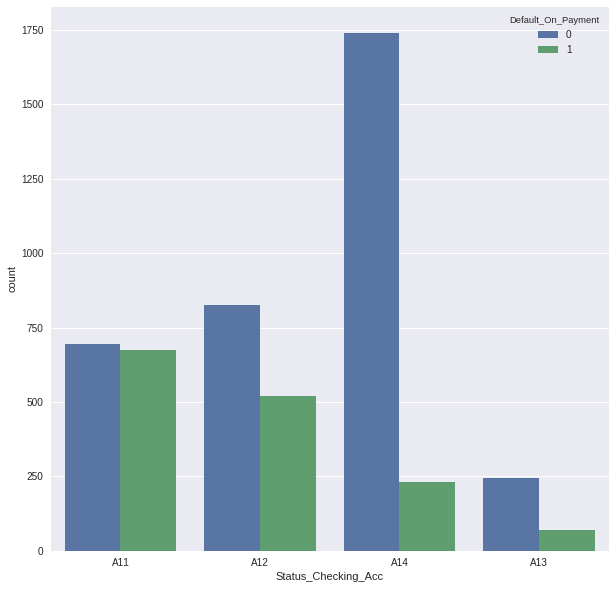

In [107]:
#Default Rate based on Status Checking Account

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Status_Checking_Acc'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Status Checking Account Default Rate.png')
k = df[df['Default_On_Payment']==1]['Status_Checking_Acc'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Status_Checking_Acc'].value_counts()

print(k/(k+k_not)*100)

2.0     29.683698
1.0     21.169916
3.0     39.860140
4.0     50.704225
5.0     46.666667
6.0    100.000000
Name: Duration_in_Years, dtype: float64


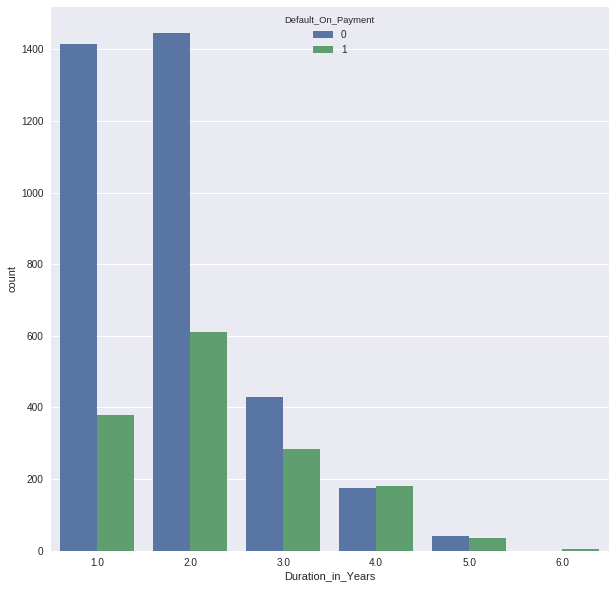

In [108]:
#Default Rate based on Duration in Months

fig, ax = plt.subplots(figsize=(10,10))
df['Duration_in_Years']=np.ceil(df['Duration_in_Months']/12)
sns.countplot(x=df['Duration_in_Years'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Duration in Years Default Rate.png')
k = df[df['Default_On_Payment']==1]['Duration_in_Years'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Duration_in_Years'].value_counts()
k_not[6.0]=0
print(k/(k+k_not)*100)

A32    31.698113
A34    17.064846
A33    31.818182
A31    57.142857
A30    62.500000
Name: Credit_History, dtype: float64


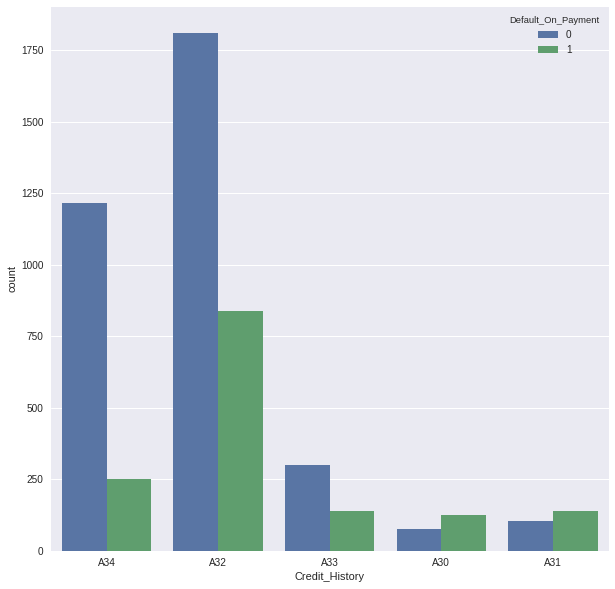

In [109]:
#Default Rate based on Credit History

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Credit_History'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Credit History Default Rate.png')
k = df[df['Default_On_Payment']==1]['Credit_History'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Credit_History'].value_counts()
print(k/(k+k_not)*100)

A40     38.034188
A41     16.504854
A410    41.666667
A42     32.044199
A43     21.785714
A44     33.333333
A45     36.363636
A46     44.000000
A48     11.111111
A49     35.051546
Name: Purposre_Credit_Taken, dtype: float64


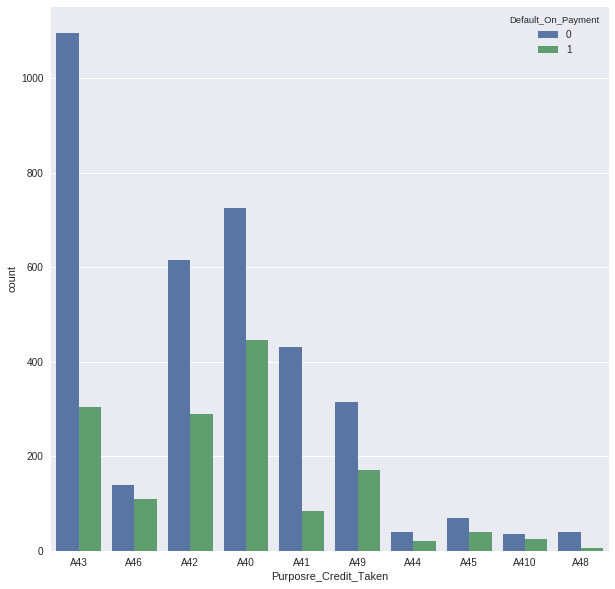

In [110]:
#Default Rate based on Purpose Credit Taken

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Purposre_Credit_Taken'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Purpose Credit Taken Default Rate.png')
k = df[df['Default_On_Payment']==1]['Purposre_Credit_Taken'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Purposre_Credit_Taken'].value_counts()
print(k/(k+k_not)*100)

A61    35.820896
A62    33.009709
A63    17.460317
A64    12.500000
A65    17.486339
Name: Savings_Acc, dtype: float64


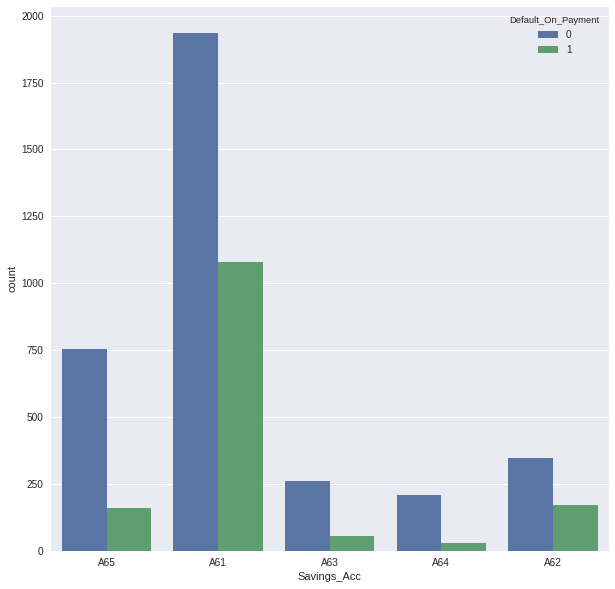

In [111]:
#Default Rate based on Savings Account

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Savings_Acc'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Savings Account Default Rate.png')
k = df[df['Default_On_Payment']==1]['Savings_Acc'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Savings_Acc'].value_counts()
print(k/(k+k_not)*100)

A71    37.096774
A72    40.697674
A73    30.383481
A74    22.413793
A75    25.296443
Name: Years_At_Present_Employment, dtype: float64


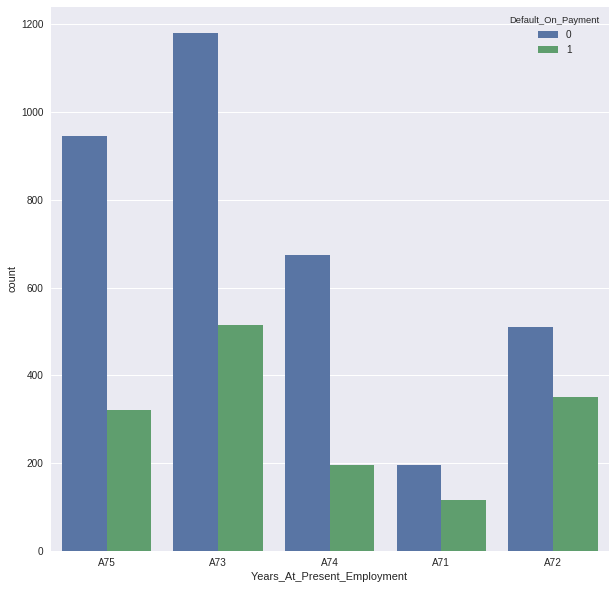

In [112]:
#Default Rate based Years of Employment Account

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Years_At_Present_Employment'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Years_At_Present_Employment Default Rate.png')
k = df[df['Default_On_Payment']==1]['Years_At_Present_Employment'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Years_At_Present_Employment'].value_counts()
print(k/(k+k_not)*100)

4    33.403361
2    26.406926
3    28.662420
1    25.000000
Name: Inst_Rt_Income, dtype: float64


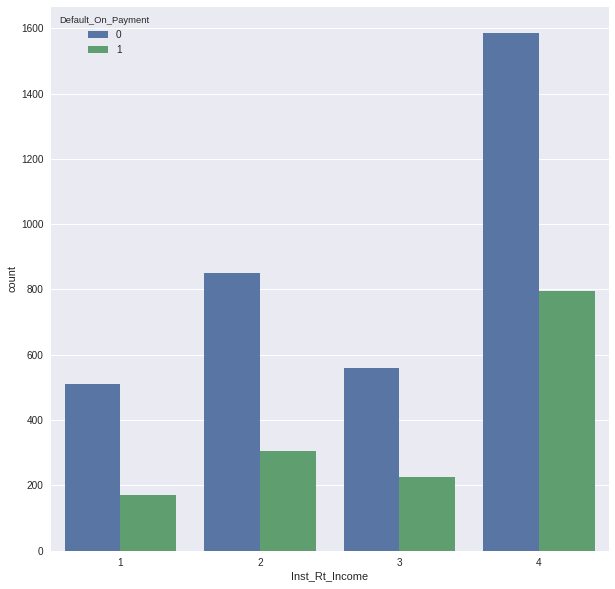

In [113]:
#Default Rate based on Installment Rate

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Inst_Rt_Income'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Installment Rate Default Rate.png')
k = df[df['Default_On_Payment']==1]['Inst_Rt_Income'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Inst_Rt_Income'].value_counts()
print(k/(k+k_not)*100)

A93    26.642336
A92    34.838710
A94    27.173913
A91    40.000000
Name: Marital_Status_Gender, dtype: float64


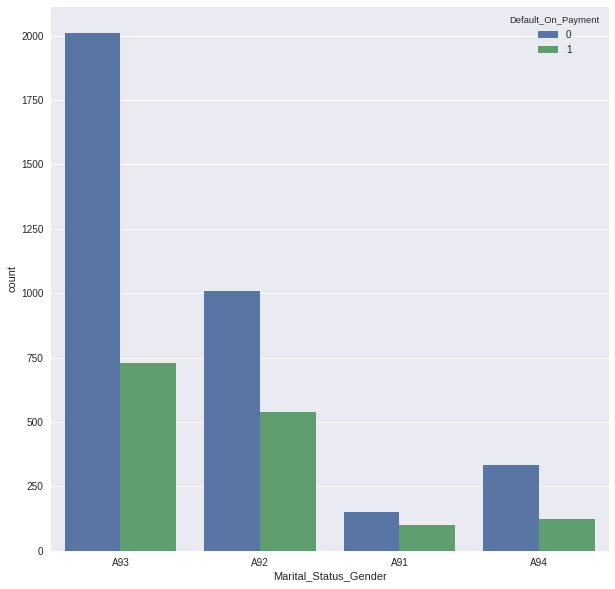

In [114]:
#Default Rate based on Marital Status Gender

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Marital_Status_Gender'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Marital Status Gender Default Rate.png')
k = df[df['Default_On_Payment']==1]['Marital_Status_Gender'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Marital_Status_Gender'].value_counts()
print(k/(k+k_not)*100)

A101    29.878721
A102    43.902439
A103    19.230769
Name: Other_Debtors_Guarantors, dtype: float64


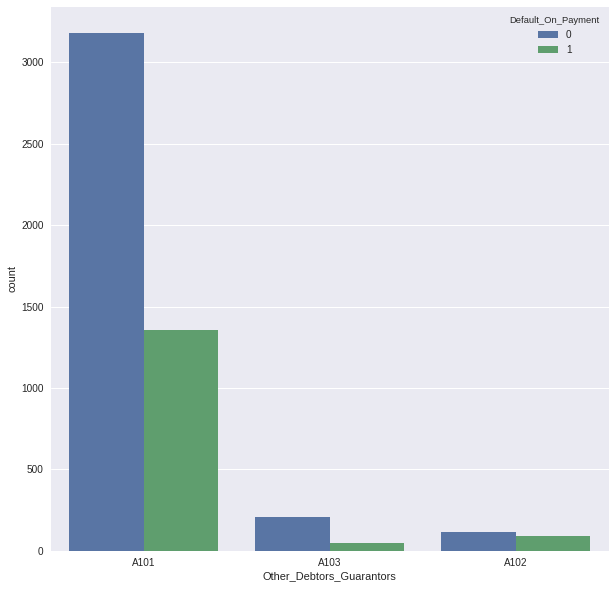

In [115]:
#Default Rate based on Other Debtors Account

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Other_Debtors_Guarantors'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Other_Debtors_Gurantors Default Rate.png')
k = df[df['Default_On_Payment']==1]['Other_Debtors_Guarantors'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Other_Debtors_Guarantors'].value_counts()
print(k/(k+k_not)*100)

4    30.024213
2    31.168831
3    28.859060
1    27.692308
Name: Current_Address_Yrs, dtype: float64


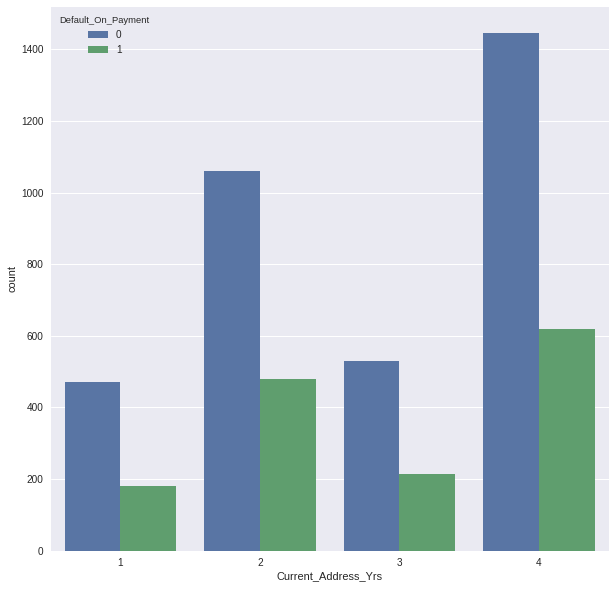

In [116]:
#Default Rate based on Current Address Years

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Current_Address_Yrs'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Current Address Default Rate.png')
k = df[df['Default_On_Payment']==1]['Current_Address_Yrs'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Current_Address_Yrs'].value_counts()
print(k/(k+k_not)*100)

A121    20.921986
A122    30.603448
A123    30.722892
A124    43.506494
Name: Property, dtype: float64


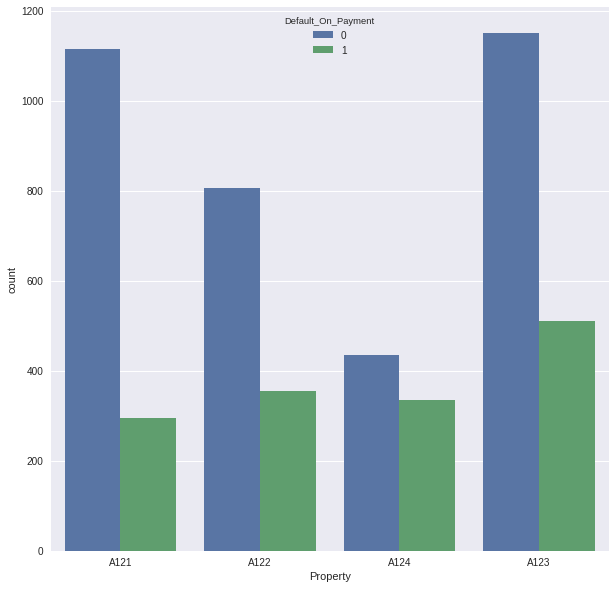

In [117]:
#Default Rate based on Property

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Property'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Property Default Rate.png')
k = df[df['Default_On_Payment']==1]['Property'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Property'].value_counts()
print(k/(k+k_not)*100)

A143    27.395577
A141    41.007194
A142    40.425532
Name: Other_Inst_Plans , dtype: float64


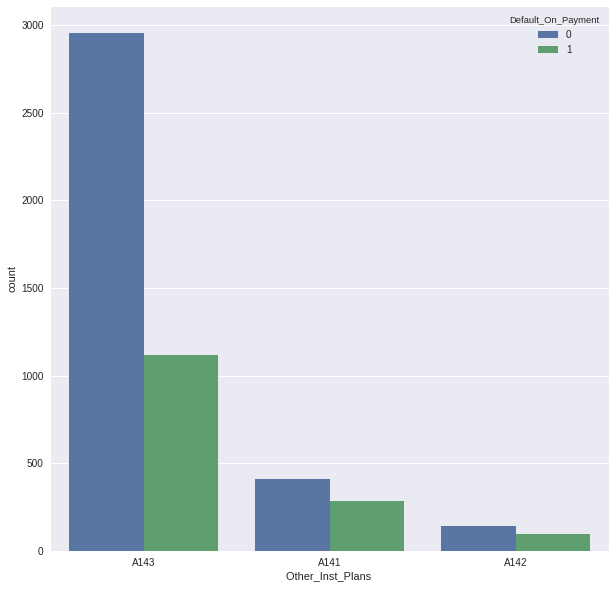

In [118]:
#Default Rate based on Other_Inst_plans

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Other_Inst_Plans '], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Other_Inst_Plans Default Rate.png')
k = df[df['Default_On_Payment']==1]['Other_Inst_Plans '].value_counts()
k_not = df[df['Default_On_Payment']==0]['Other_Inst_Plans '].value_counts()
print(k/(k+k_not)*100)

A152    25.946704
A151    39.106145
A153    40.740741
Name: Housing, dtype: float64


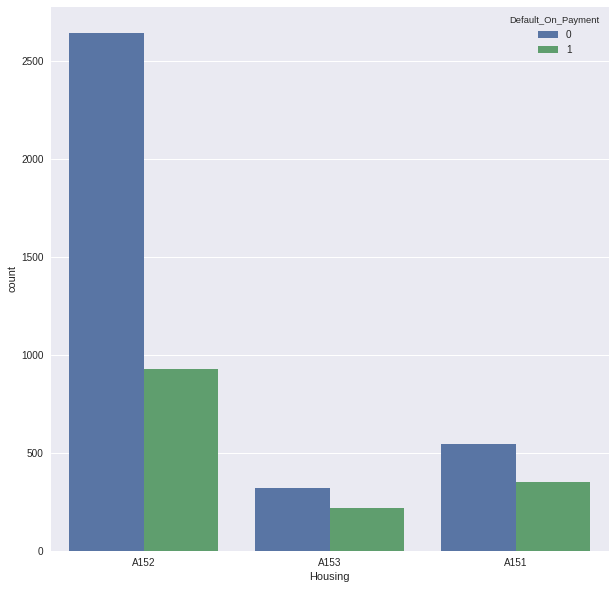

In [119]:
#Default Rate based on Housing

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Housing'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Housing Default Rate.png')
k = df[df['Default_On_Payment']==1]['Housing'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Housing'].value_counts()
print(k/(k+k_not)*100)

1    31.437599
2    27.627628
3    21.428571
4    33.333333
Name: Num_CC, dtype: float64


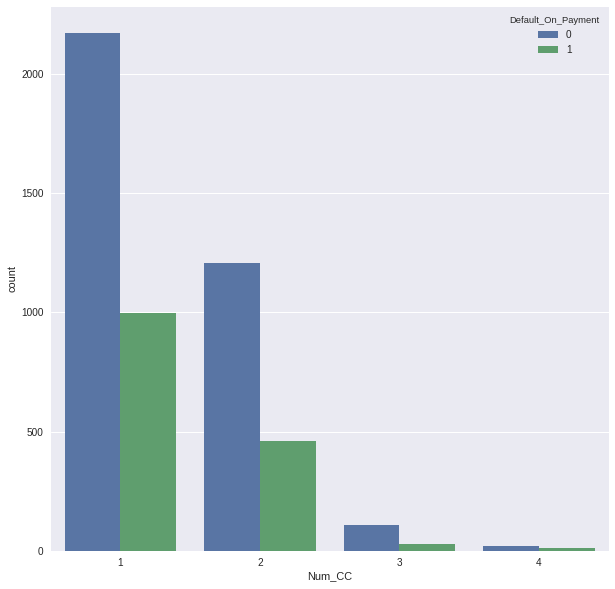

In [120]:
#Default Rate based on Existing Credits

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Num_CC'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Exisint Credits DR.png')
k = df[df['Default_On_Payment']==1]['Num_CC'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Num_CC'].value_counts()
print(k/(k+k_not)*100)

A173    29.365079
A172    28.000000
A174    34.459459
A171    31.818182
Name: Job, dtype: float64


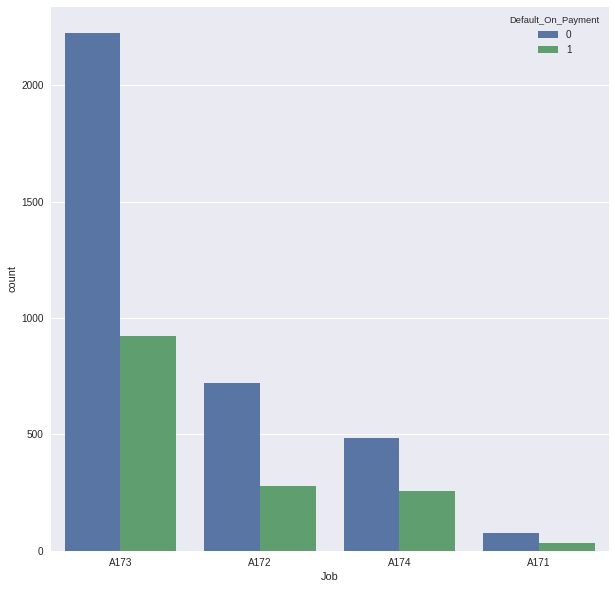

In [121]:
#Default Rate based on Job

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Job'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/job Default Rate.png')
k = df[df['Default_On_Payment']==1]['Job'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Job'].value_counts()
print(k/(k+k_not)*100)

1    29.940828
2    29.677419
Name: Dependents, dtype: float64


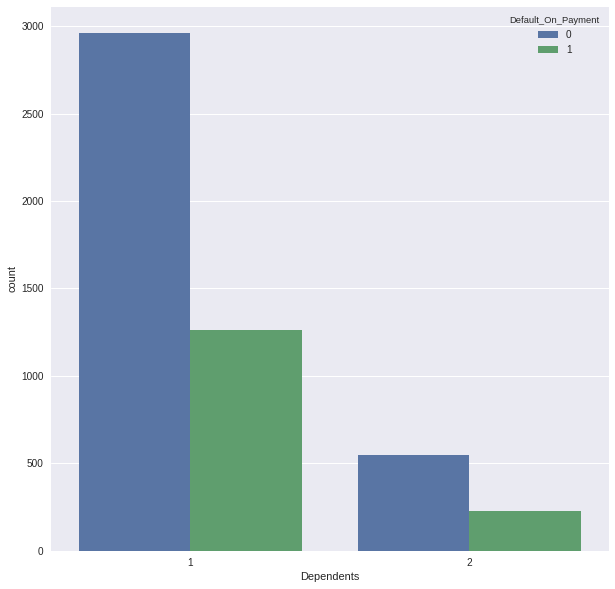

In [122]:
#Default Rate based on Dependents

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Dependents'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Dependents Default Rate.png')
k = df[df['Default_On_Payment']==1]['Dependents'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Dependents'].value_counts()
print(k/(k+k_not)*100)

A191    31.208054
A192    27.970297
Name: Telephone, dtype: float64


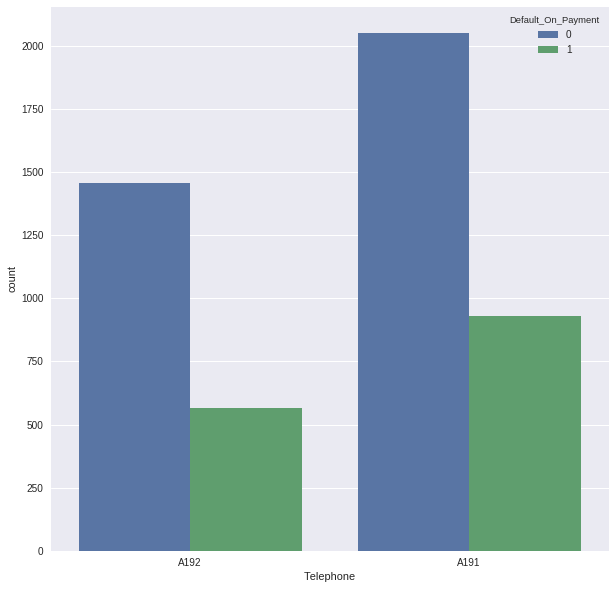

In [123]:
#Default Rate based on Telephones

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Telephone'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Telephones Default Rate.png')
k = df[df['Default_On_Payment']==1]['Telephone'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Telephone'].value_counts()
print(k/(k+k_not)*100)

A201    30.633437
A202    10.810811
Name: Foreign_Worker, dtype: float64


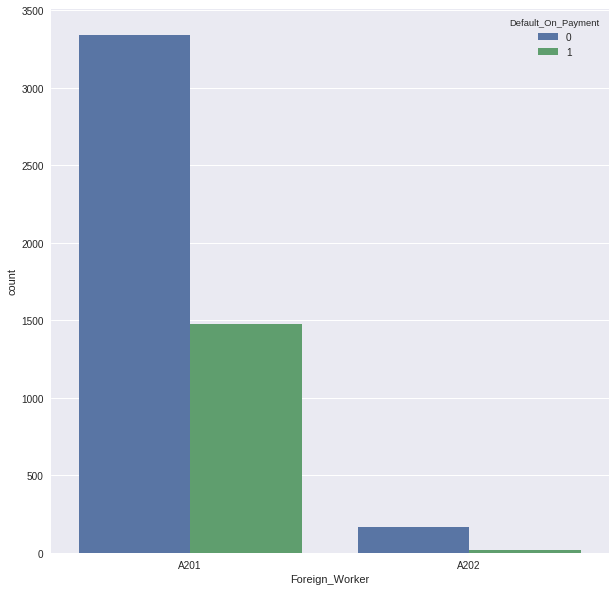

In [124]:
#Default Rate based on Telephones

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Foreign_Worker'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/ForeignWorker Default Rate.png')
k = df[df['Default_On_Payment']==1]['Foreign_Worker'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Foreign_Worker'].value_counts()
print(k/(k+k_not)*100)

In [125]:
df1 = df.copy()
df1 = df1.drop(['Foreign_Worker','Duration_in_Months'],axis=1)
df = df.drop(['Foreign_Worker','Duration_in_Years'], axis=1)

In [126]:
df_new = pd.get_dummies(df)

In [127]:
df_new.columns

Index(['Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Default_On_Payment', 'Status_Checking_Acc_A11',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A30', 'Credit_History_A31',
       'Credit_History_A32', 'Credit_History_A33', 'Credit_History_A34',
       'Purposre_Credit_Taken_A40', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A61', 'Savings_Acc_A62', 'Savings_Acc_A63',
       'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A71',
       'Years_At_Present_Employment_A72', 'Years_At_Present_Employment_A73',
       'Years_At_Present_Employment_A74', 'Years_At_Present_

In [129]:
X = df_new.drop(['Default_On_Payment'], axis=1)
y = df_new['Default_On_Payment']

In [131]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [142]:
#Just checking the result without scaling
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [143]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.77636363636363637

# As we see the accuracy is not so good.Let us try to improve it